In [ ]:
import pandas as pd
import requests
import json
import seaborn as sns
import duckdb
import utils


/Users/emirysaglam/GitHub/Bitirme2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## **Consumer Barometer**

The **OECD Consumer Barometer** reflects the monthly growth rate of the normalized **Consumer Confidence Indicator (CCI)**. The CCI is computed as the average of the following four components:
1. Financial situation over the past 12 months
2. Financial situation over the next 12 months
3. General economic situation over the next 12 months
4. Major purchases expected in the next 12 months

Normalization is achieved by subtracting the mean of the CCI and dividing by its standard deviation. A value of 100 is added for rescaling purposes.

- **Interpretation**: 
  - An OECD Consumer Barometer reading **greater than 100** signals optimism, suggesting a positive outlook on future economic conditions, which encourages higher spending on major purchases and a modest tendency to save.
  - A reading **below 100** signals pessimism, indicating a preference for saving over spending, due to concerns about the economy.

**Frequency of Observation**: Monthly  
**Measure**: Composite Consumer Confidence  
**Adjustment**: Normalized  
**Transformation**: Growth rate, period-on-period  
**Topic**: Economy > Leading Indicators and Tendency Surveys, Economy > Short-Term Economic Statistics  
**Number of Unfiltered Data Points**: 20,867  
**Last Updated**: March 01, 2025, at 5:43:22 AM



In [ ]:

#Use the URL that the web page gave you
url0 = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_LFS@DF_IALFS_INDIC,/.EMP_WAP...Y.M+F+_T.Y15T64..A?dimensionAtObservation=AllDimensions"
url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_CSBAR,/CRI+COL+CHL+CAN+A5M+ZAF+RUS+IDN+CHN+IND+BRA+WXOECD+OECDE+OECDXEA+OECD+G7+USA+GBR+TUR+CHE+SWE+ESP+SVN+SVK+PRT+POL+NZL+MEX+NLD+LUX+LTU+LVA+KOR+JPN+ITA+ISR+IRL+HUN+GRC+FRA+DEU+EST+FIN+DNK+CZE+BEL+AUT+AUS.M.......?dimensionAtObservation=AllDimensions'

consumer_barometer = utils.get_oecd_data(url)
consumer_barometer.head(5)


,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,Value
0,DEU,M,CCICP,GR,_Z,NOR,G1,_Z,H,1973-02,-0.356378
1,DEU,M,CCICP,GR,_Z,NOR,G1,_Z,H,1973-03,-0.476870
2,DEU,M,CCICP,GR,_Z,NOR,G1,_Z,H,1973-04,-0.598943
3,DEU,M,CCICP,GR,_Z,NOR,G1,_Z,H,1973-05,-0.482042
4,DEU,M,CCICP,GR,_Z,NOR,G1,_Z,H,1973-06,-0.121094


In [6]:
for i in consumer_barometer.columns:    
    print(f"******* {i} *******")
    print(consumer_barometer[i].unique())

******* REF_AREA *******
['DEU' 'CZE' 'OECDXEA' 'CHL' 'FRA' 'NZL' 'SVN' 'EST' 'TUR' 'CRI' 'IDN'
 'AUS' 'MEX' 'RUS' 'A5M' 'ITA' 'COL' 'SVK' 'G7' 'CHN' 'GBR' 'CHE' 'CAN'
 'OECDE' 'NLD' 'GRC' 'ISR' 'BEL' 'PRT' 'JPN' 'ESP' 'USA' 'SWE' 'POL' 'AUT'
 'LTU' 'IND' 'HUN' 'ZAF' 'LUX' 'OECD' 'LVA' 'IRL' 'KOR' 'BRA' 'DNK' 'FIN']
******* FREQ *******
['M']
******* MEASURE *******
['CCICP']
******* UNIT_MEASURE *******
['GR']
******* ACTIVITY *******
['_Z']
******* ADJUSTMENT *******
['NOR']
******* TRANSFORMATION *******
['G1']
******* TIME_HORIZ *******
['_Z']
******* METHODOLOGY *******
['H']
******* TIME_PERIOD *******
['1973-02' '1973-03' '1973-04' '1973-05' '1973-06' '1973-07' '1973-08'
 '1973-09' '1973-10' '1973-11' '1973-12' '1974-01' '1974-02' '1974-03'
 '1974-04' '1974-05' '1974-06' '1974-07' '1974-08' '1974-09' '1974-10'
 '1974-11' '1974-12' '1975-01' '1975-02' '1975-03' '1975-04' '1975-05'
 '1975-06' '1975-07' '1975-08' '1975-09' '1975-10' '1975-11' '1975-12'
 '1976-01' '1976-02' '1976-03

In [7]:
consumer_barometer_f = consumer_barometer[["REF_AREA","TIME_PERIOD","Value"]]
consumer_barometer_f.columns = ["GEO","DATE","CBAR"]
consumer_barometer_f.set_index("DATE", inplace=True)
consumer_barometer_f

,GEO,CBAR
DATE,,
1973-02,DEU,-0.356378
1973-03,DEU,-0.476870
1973-04,DEU,-0.598943
1973-05,DEU,-0.482042
1973-06,DEU,-0.121094
...,...,...
2024-10,FIN,0.252622
2024-11,FIN,-0.083995
2024-12,FIN,-0.084066



## **Financial Market (Not Rate of Change Over Time)**

**Financial Indicators** aim to quantitatively capture a dynamic and diverse area, which is rapidly evolving. Key factors driving this change include:

- Globalization of financial markets
- Maturation of national financial markets and the structural adjustments needed to meet market demands
- Increasing sophistication of market participants
- Rapid technological advancements
- Evolving regulatory frameworks

In response to these changes, financial institutions adapt their strategies by:
- Specializing in specific areas
- Diversifying or concentrating their activities
- Expanding through mergers and acquisitions

As a result, institutional structures in financial markets are in a constant state of evolution.

#### Types of Financial Indicators:
- **(PA)**: Percent per annum
- **(IX)**: Index
- **(IRLT)**: Long-term interest rates
- **(IR3TIB)**: Short-term interest rates
- **(IRSTCI)**: Immediate interest rates (call money, interbank rate)
- **(SHARE)**: Share prices


In [ ]:

#Use the URL that the web page gave you

url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_FINMARK,4.0/.M.SHARE+IR3TIB+IRLT+IRSTCI......?dimensionAtObservation=AllDimensions'


interest_rates = utils.get_oecd_data(url)
interest_rates.head(5)

,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,Value
0,NZL,M,IR3TIB,PA,_Z,_Z,_Z,_Z,N,1973-12,7.88
1,NZL,M,IR3TIB,PA,_Z,_Z,_Z,_Z,N,1974-01,8.38
2,NZL,M,IR3TIB,PA,_Z,_Z,_Z,_Z,N,1974-02,8.75
3,NZL,M,IR3TIB,PA,_Z,_Z,_Z,_Z,N,1974-03,9.00
4,NZL,M,IR3TIB,PA,_Z,_Z,_Z,_Z,N,1974-04,9.00


In [9]:
for i in interest_rates.columns:    
    print(f"******* {i} *******")
    print(interest_rates[i].unique())

******* REF_AREA *******
['NZL' 'POL' 'PRT' 'IDN' 'IRL' 'CHN' 'DEU' 'JPN' 'EST' 'HRV' 'GBR' 'ITA'
 'GRC' 'CAN' 'NOR' 'SVK' 'IND' 'TUR' 'FRA' 'ISR' 'USA' 'EA19' 'KOR' 'LVA'
 'AUS' 'NLD' 'CZE' 'CRI' 'BEL' 'ESP' 'LTU' 'ISL' 'HUN' 'COL' 'RUS' 'SVN'
 'SWE' 'CHL' 'ROU' 'CHE' 'ZAF' 'LUX' 'FIN' 'AUT' 'BGR' 'BRA' 'MEX' 'DNK']
******* FREQ *******
['M']
******* MEASURE *******
['IR3TIB' 'IRSTCI' 'SHARE' 'IRLT']
******* UNIT_MEASURE *******
['PA' 'IX']
******* ACTIVITY *******
['_Z']
******* ADJUSTMENT *******
['_Z']
******* TRANSFORMATION *******
['_Z']
******* TIME_HORIZ *******
['_Z']
******* METHODOLOGY *******
['N']
******* TIME_PERIOD *******
['1973-12' '1974-01' '1974-02' '1974-03' '1974-04' '1974-05' '1974-06'
 '1974-07' '1974-08' '1974-09' '1974-10' '1974-11' '1974-12' '1975-01'
 '1975-02' '1975-03' '1975-04' '1975-05' '1975-06' '1975-07' '1975-08'
 '1975-09' '1975-10' '1975-11' '1975-12' '1976-01' '1976-02' '1976-03'
 '1976-04' '1976-05' '1976-06' '1976-07' '1976-08' '1976-09' '1976-10'

In [10]:
long_term_interest_rates = interest_rates[interest_rates["MEASURE"]=="IRLT"][["REF_AREA","TIME_PERIOD","Value"]]
long_term_interest_rates.columns = ["GEO","DATE","LTIR"]
long_term_interest_rates.set_index("DATE", inplace=True)

short_term_interest_rates = interest_rates[interest_rates["MEASURE"]=="IR3TIB"][["REF_AREA","TIME_PERIOD","Value"]]
short_term_interest_rates.columns = ["GEO","DATE","STIR"]
short_term_interest_rates.set_index("DATE", inplace=True)

itermediate_interest_rates = interest_rates[interest_rates["MEASURE"]=="IRSTCI"][["REF_AREA","TIME_PERIOD","Value"]]
itermediate_interest_rates.columns = ["GEO","DATE","IIR"]
itermediate_interest_rates.set_index("DATE", inplace=True)


In [11]:
long_term_interest_rates

,GEO,LTIR
DATE,,
1970-12,IRL,10.017210
1971-01,IRL,9.976569
1971-02,IRL,10.007050
1971-03,IRL,9.661627
1971-04,IRL,9.549873
...,...,...
2024-10,GBR,4.199300
2024-11,GBR,4.416400
2024-12,GBR,4.434500


In [12]:
interest_rates_df = long_term_interest_rates.merge(short_term_interest_rates, on=["DATE","GEO"], how="outer")
interest_rates_df = interest_rates_df.merge(itermediate_interest_rates, on=["DATE","GEO"], how="outer")
interest_rates_df

,GEO,LTIR,STIR,IIR
DATE,,,,
1953-04,USA,2.83000,NaN,NaN
1953-05,USA,3.05000,NaN,NaN
1953-06,USA,3.11000,NaN,NaN
1953-07,USA,2.93000,NaN,NaN
1953-08,USA,2.95000,NaN,NaN
...,...,...,...,...
2025-02,SVK,3.22290,2.52495,2.732345
2025-02,SVN,2.93000,2.52495,2.732345
2025-02,SWE,2.25515,2.28020,NaN


## **Monthly Unemployment Rates (Not Rate of Change)**

The **infra-annual dataflow on monthly unemployment rates** is a subset of the infra-annual labour statistics database. It primarily contains monthly and quarterly statistics on the unemployed population, broken down by age groups (15+, 15-24, 25-54, 55-64, 15-64, and 15-74 where available) and sex. The database also includes relevant statistical methodological information, covering the OECD member countries and selected other economies.

The **unemployment rate** is calculated as the number of unemployed persons as a percentage of the labour force (i.e., unemployed persons plus those employed). The unemployed are defined as individuals within the working-age population who, during the reference period:
- Do not have a job,
- Are available for work, and
- Have taken specific steps to find a job.

The data is based on Labour Force Surveys, adhering to definitions provided by the **19th Conference of Labour Statisticians (2013)**. The consistent application of these definitions across OECD member countries ensures that the estimates are internationally comparable.

- **Measure**: Monthly unemployment rate  
- **Unit of Measure**: Percentage of the labour force in the same subgroup  
- **Topic**: Economy > Short-term economic statistics, Employment > Unemployment indicators  
- **Number of Unfiltered Data Points**: 429,096  
- **Last Updated**: February 28, 2025, at 5:42:17 AM  

The data is available in both **calendar** and **seasonally adjusted** formats.


In [ ]:
#Use the URL that the web page gave you

url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_LFS@DF_IALFS_UNE_M,/..._Z.Y.M+F+_T.Y_GE15..M?dimensionAtObservation=AllDimensions'


unemployment_rates = utils.get_oecd_data(url)
unemployment_rates.head(5)

,REF_AREA,MEASURE,UNIT_MEASURE,TRANSFORMATION,ADJUSTMENT,SEX,AGE,ACTIVITY,FREQ,TIME_PERIOD,Value
0,OECD,UNE_LF_M,PT_LF_SUB,_Z,Y,_T,Y_GE15,_Z,M,2020-09,7.372206
1,OECD,UNE_LF_M,PT_LF_SUB,_Z,Y,_T,Y_GE15,_Z,M,2020-08,7.567317
2,OECD,UNE_LF_M,PT_LF_SUB,_Z,Y,_T,Y_GE15,_Z,M,2009-10,8.685646
3,OECD,UNE_LF_M,PT_LF_SUB,_Z,Y,_T,Y_GE15,_Z,M,2009-09,8.661528
4,OECD,UNE_LF_M,PT_LF_SUB,_Z,Y,_T,Y_GE15,_Z,M,2009-08,8.579891


In [15]:
for i in unemployment_rates.columns:    
    print(f"******* {i} *******")
    print(unemployment_rates[i].unique())

******* REF_AREA *******
['OECD' 'BEL' 'CRI' 'LVA' 'TUR' 'NLD' 'JPN' 'EA20' 'CZE' 'FIN' 'ESP' 'MEX'
 'LTU' 'NOR' 'AUS' 'DEU' 'SWE' 'LUX' 'USA' 'COL' 'ISR' 'EU27_2020' 'ITA'
 'G7' 'GRC' 'PRT' 'SVK' 'DNK' 'AUT' 'HUN' 'KOR' 'CAN' 'POL' 'FRA' 'SVN'
 'ISL' 'GBR' 'CHL' 'IRL' 'EST' 'BGR' 'HRV']
******* MEASURE *******
['UNE_LF_M']
******* UNIT_MEASURE *******
['PT_LF_SUB']
******* TRANSFORMATION *******
['_Z']
******* ADJUSTMENT *******
['Y']
******* SEX *******
['_T' 'F' 'M']
******* AGE *******
['Y_GE15']
******* ACTIVITY *******
['_Z']
******* FREQ *******
['M']
******* TIME_PERIOD *******
['2020-09' '2020-08' '2009-10' '2009-09' '2009-08' '2009-07' '2009-06'
 '2009-05' '2009-04' '2009-03' '2009-02' '2009-01' '2008-12' '2008-11'
 '2008-10' '2008-09' '2008-08' '2008-07' '2008-06' '2008-05' '2008-04'
 '2008-03' '2008-02' '2008-01' '2007-12' '2007-11' '2007-10' '2007-09'
 '2007-08' '2007-07' '2007-06' '2007-05' '2007-04' '2007-03' '2007-02'
 '2007-01' '2006-12' '2006-11' '2006-10' '2006-09' '

In [14]:
unemployment_rates_f = unemployment_rates[unemployment_rates["SEX"]=="_T"][["REF_AREA","TIME_PERIOD","Value"]]
unemployment_rates_f.columns = ["GEO","DATE","UEMPR"]
unemployment_rates_f.set_index("DATE", inplace=True)
unemployment_rates_f

,GEO,UEMPR
DATE,,
2020-09,OECD,7.372206
2020-08,OECD,7.567317
2009-10,OECD,8.685646
2009-09,OECD,8.661528
2009-08,OECD,8.579891
...,...,...
1983-02,PRT,8.100000
1983-03,PRT,8.300000
1983-04,PRT,8.500000


In [15]:
unemployment_rates_f

,GEO,UEMPR
DATE,,
2020-09,OECD,7.372206
2020-08,OECD,7.567317
2009-10,OECD,8.685646
2009-09,OECD,8.661528
2009-08,OECD,8.579891
...,...,...
1983-02,PRT,8.100000
1983-03,PRT,8.300000
1983-04,PRT,8.500000


## **Merging the Data**

In [16]:
df_merged = interest_rates_df.merge(consumer_barometer_f, on=["DATE","GEO"], how="outer")
df_merged = df_merged.merge(unemployment_rates_f, on=["DATE","GEO"], how="outer")
df_merged

,GEO,LTIR,STIR,IIR,CBAR,UEMPR
DATE,,,,,,
1953-04,USA,2.83000,NaN,NaN,NaN,NaN
1953-05,USA,3.05000,NaN,NaN,NaN,NaN
1953-06,USA,3.11000,NaN,NaN,NaN,NaN
1953-07,USA,2.93000,NaN,NaN,NaN,NaN
1953-08,USA,2.95000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2025-02,SWE,2.25515,2.2802,NaN,-0.471260,NaN
2025-02,TUR,NaN,NaN,NaN,0.110871,NaN
2025-02,USA,4.45000,4.3400,4.33,-0.557693,4.1


In [19]:
df_merged[df_merged["GEO"]=="GBR"].reset_index()

,DATE,GEO,LTIR,STIR,IIR,CBAR,UEMPR
0,1986-01,GBR,11.1300,12.86300,11.5000,-0.152054,11.2
1,1986-02,GBR,10.7300,12.71875,12.5600,-0.141407,11.1
2,1986-03,GBR,9.6900,11.77679,12.7500,-0.054465,11.2
3,1986-04,GBR,8.9400,10.57670,11.4300,0.130786,11.3
4,1986-05,GBR,9.1500,10.26705,10.5600,-0.032654,11.3
...,...,...,...,...,...,...,...
463,2024-08,GBR,3.9444,4.91000,4.9500,0.081369,4.3
464,2024-09,GBR,3.9053,4.84000,4.9500,-0.894329,4.3
465,2024-10,GBR,4.1993,4.75000,4.9500,0.027345,4.4
466,2024-11,GBR,4.4164,4.68000,4.7476,0.246042,4.4


<Figure size 2000x500 with 0 Axes>

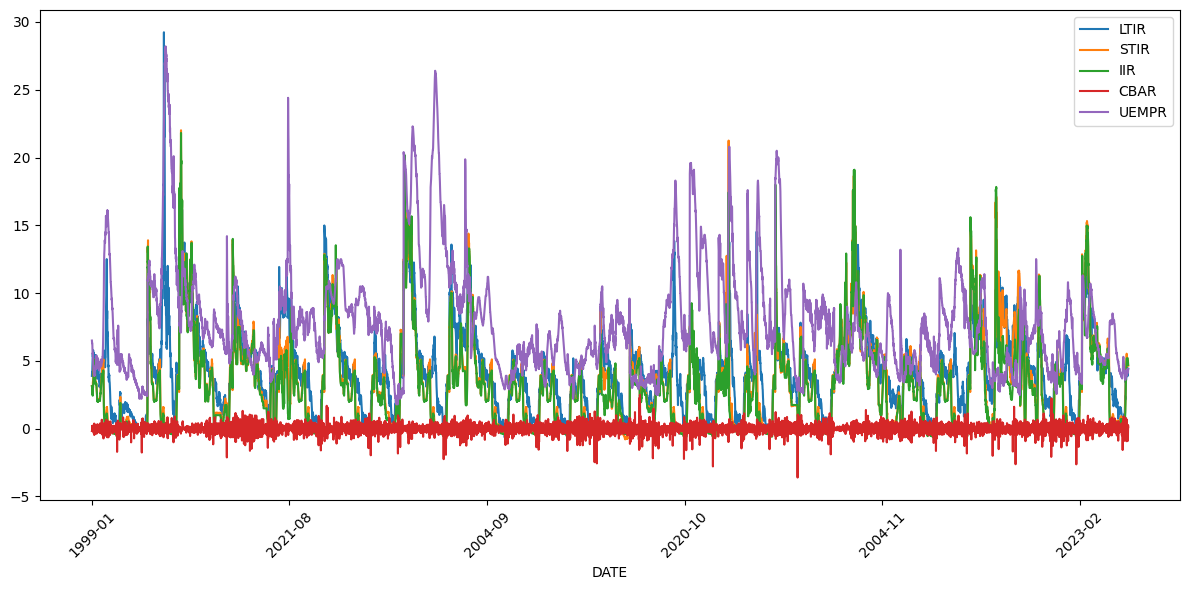

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(20, 5))

df_merged.plot(figsize=(12, 6))

plt.xticks(rotation=45)  # Rotate labels 45 degrees
plt.tight_layout()       # Adjust layout to prevent cutoff
plt.show()


In [ ]:
df_merged.reset_index(inplace=True)
df_merged["DATE"] = df_merged["DATE"].astype(str)


DATE      object
GEO       object
LTIR     float64
STIR     float64
IIR      float64
CBAR     float64
UEMPR    float64
dtype: object

In [18]:
df_merged.dtypes.to_dict()

{'DATE': dtype('O'),
 'GEO': dtype('O'),
 'LTIR': dtype('float64'),
 'STIR': dtype('float64'),
 'IIR': dtype('float64'),
 'CBAR': dtype('float64'),
 'UEMPR': dtype('float64')}

## **DB Creation**


In [23]:
con = duckdb.connect("data.db")


In [24]:
con.sql("SELECT * FROM oecd").df()         # Pandas DataFrame


,DATE,GEO,LTIR,STIR,IIR,CBAR,UEMPR
0,1953-04,USA,2.83000,NaN,NaN,NaN,NaN
1,1953-05,USA,3.05000,NaN,NaN,NaN,NaN
2,1953-06,USA,3.11000,NaN,NaN,NaN,NaN
3,1953-07,USA,2.93000,NaN,NaN,NaN,NaN
4,1953-08,USA,2.95000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
30292,2025-02,SWE,2.25515,2.2802,NaN,-0.471260,NaN
30293,2025-02,TUR,NaN,NaN,NaN,0.110871,NaN
30294,2025-02,USA,4.45000,4.3400,4.33,-0.557693,4.1
30295,2025-02,ZAF,10.49700,7.4200,7.50,NaN,NaN


In [25]:
con.sql("SELECT * FROM ecb").df()         # Pandas DataFrame


,DATE,M1,M2,M3,GEO
0,1980-01,NaN,NaN,1107100.0,EU
1,1980-02,-4779.0,-257.0,1107384.0,EU
2,1980-03,7777.0,10039.0,1119526.0,EU
3,1980-04,1095.0,2006.0,1121677.0,EU
4,1980-05,3340.0,5559.0,1127563.0,EU
...,...,...,...,...,...
536,2024-09,27400.0,53409.0,16527365.0,EU
537,2024-10,-11327.0,-26832.0,16548435.0,EU
538,2024-11,186955.0,169099.0,16732694.0,EU
539,2024-12,64125.0,86966.0,16807105.0,EU


In [26]:
con.sql("SELECT * FROM eurostat").df()         # Pandas DataFrame


,GEO,Retail_Volume,CPI
0,BR,NaN,41.3
1,CA,NaN,0.0
2,CN,NaN,4.0
3,DE,NaN,0.4
4,FR,NaN,0.1
...,...,...,...
16771,ID,NaN,-0.5
16772,IT,NaN,0.1
16773,KR,NaN,0.3
16774,ME,-0.6,NaN


In [54]:
query = """
    SELECT *
    FROM oecd
    FULL OUTER JOIN ecb ON oecd.DATE = ecb.DATE AND oecd.GEO = ecb.GEO
    FULL OUTER JOIN eurostat ON oecd.DATE = eurostat.DATE AND oecd.GEO = eurostat.GEO
"""

In [60]:
query = """
SELECT *
FROM oecd
FULL OUTER JOIN ecb
  ON oecd.DATE = ecb.DATE AND oecd.GEO = ecb.GEO;"""

In [61]:
con.sql(query).df()


,DATE,GEO,LTIR,STIR,IIR,CBAR,UEMPR,DATE_1,M1,M2,M3,GEO_1
0,1999-01,IRL,3.8915,3.132100,3.1370,-0.173725,6.5,None,NaN,NaN,NaN,None
1,1999-02,IRL,4.0235,3.093400,3.1180,-0.147254,6.3,None,NaN,NaN,NaN,None
2,1999-03,IRL,4.1878,3.046696,2.9252,0.207800,6.3,None,NaN,NaN,NaN,None
3,1999-04,IRL,3.9468,2.696455,2.7091,-0.046825,6.3,None,NaN,NaN,NaN,None
4,1999-05,IRL,4.1819,2.578952,2.5510,0.060232,6.3,None,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
11027,None,None,NaN,NaN,NaN,NaN,NaN,2021-05,119395.0,119129.0,14908357.0,EU
11028,None,None,NaN,NaN,NaN,NaN,NaN,2021-10,69028.0,82399.0,15366674.0,EU
11029,None,None,NaN,NaN,NaN,NaN,NaN,2024-07,-81800.0,-70372.0,16390623.0,EU
11030,None,None,NaN,NaN,NaN,NaN,NaN,2024-10,-11327.0,-26832.0,16548435.0,EU


In [27]:
con.close()

## **Writing to DB**

In [19]:
# You can also use the `from_df` function for direct insertion:
# con.from_df(df, "my_table")
con = duckdb.connect("data.db")


In [20]:
con.execute("DROP TABLE oecd")


In [21]:




con.execute("CREATE TABLE oecd AS SELECT * FROM df_merged")


# Verify the data was written to the database
con.sql("SELECT * FROM oecd").df()         # Pandas DataFrame





,DATE,GEO,LTIR,STIR,IIR,CBAR,UEMPR
0,1953-04,USA,2.83000,NaN,NaN,NaN,NaN
1,1953-05,USA,3.05000,NaN,NaN,NaN,NaN
2,1953-06,USA,3.11000,NaN,NaN,NaN,NaN
3,1953-07,USA,2.93000,NaN,NaN,NaN,NaN
4,1953-08,USA,2.95000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
30292,2025-02,SWE,2.25515,2.2802,NaN,-0.471260,NaN
30293,2025-02,TUR,NaN,NaN,NaN,0.110871,NaN
30294,2025-02,USA,4.45000,4.3400,4.33,-0.557693,4.1
30295,2025-02,ZAF,10.49700,7.4200,7.50,NaN,NaN


In [22]:
con.close()